**Hands-on ML Workshop**


Task: Train a Simple Machine Learning Model in Python


Tools: Google Colab: iris.csv

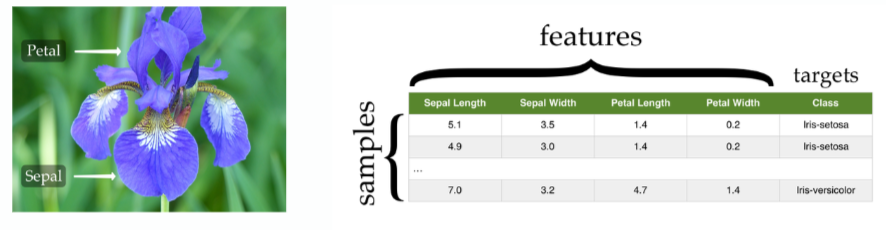

# Data Preprocessing

1.Get and Import Iris Data

In [ ]:
import pandas as pd

iris_df =

2.Inspect data

In [ ]:
# Display the Iris dataset


In [ ]:
#Display the df information



In [ ]:
#Count data in each species (class)

iris_df['species'].value_counts()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the color palette to a categorical color scheme
sns.set_palette("Set1")

# Create a scatter plot using Seaborn
plt.figure(figsize=(6, 3))
sns.scatterplot(data=iris_df, x='petal_length', y='petal_width', hue='species')

sns.set_style("white")  # or sns.set_style("ticks")
# Set plot properties
plt.title('Scatter Plot of Petal Length vs. Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(title='Species')

# Show the plot
plt.show()

In [ ]:
#Plot sepal_length	vs sepal_width
# Create a scatter plot using Seaborn



3.Data Splitting

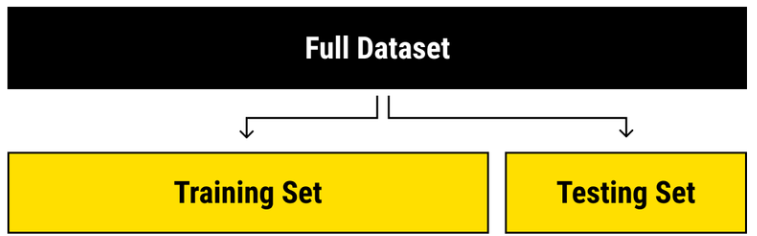

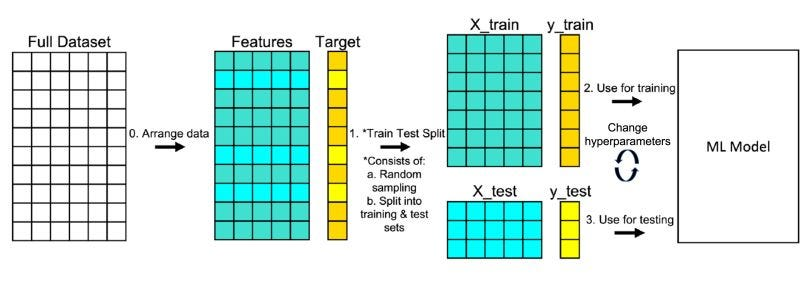

In [ ]:
iris_df

In [ ]:
#Dropout label
X = iris_df.drop('', axis=1)
y = iris_df['']

In [ ]:
X

In [ ]:
y

In [ ]:
#Inspect X after drop Species column
print('X.shape : ',)
print('y.shape :',)

In [ ]:
#Split to train 80 test20

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =

In [ ]:
X_test

In [ ]:
#Inspect shape of the data after train_test_split
print('X train : ', X_train.shape)
print('X test :', X_test.shape)

# Create and Train a Model : DecisionTreeClassifier

 Create and configure the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Defining an object for DTC and fitting for whole dataset
#dt = DecisionTreeClassifier(max_depth= , min_samples_leaf= , random_state=42)
dt.fit(X, y)

In [ ]:
# Plotting of decission tree
from IPython.display import Image
from sklearn.tree import export_graphviz

!pip install pydotplus
import pydotplus


features = X.columns
dot_data = export_graphviz(dt, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Train the model

In [ ]:
# Defining an object for DTC and fitting for train dataset
dt = DecisionTreeClassifier(random_state=42)
#fit train data (X_train) and label (y_train)
#dt.fit(,)

Make Predictions

In [ ]:
y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

In [ ]:
y_pred

In [ ]:
y_test

Evaluate the Model

In [ ]:
#Plot Accuracy score
from sklearn.metrics import accuracy_score

#plot Accuracy of Decision Tree-Train of y_pred_train, y_train
#print('Accuracy of Decision Tree-Train: ',  )

#plot Accuracy of Decision Tree-Test of y_pred, y_test
#print('Accuracy of Decision Tree-Test: ', )

In [ ]:
#Classification for test before hyperparameter tuning
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Task!!!**

Try adjust parameter max_depth min_samples_split or train, test size to get better performance

**Hyperparameter Tuning**

How do you know what values of parameters should be selected for the best model performance?


In [ ]:
#Grid Search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
dt = DecisionTreeClassifier(random_state=42)

params = {'max_depth' : [2,3,4,5,6,7,8,9],
        'min_samples_split': [2,3,4,5,6,7,8,9],
        'min_samples_leaf': [2,3,4,5,6,7,8,9]}

gsearch = GridSearchCV(dt, param_grid=params, cv=3)

gsearch.fit(X,y)

gsearch.best_params_

In [ ]:
# Passing best parameter for the Hyperparameter Tuning
dt = DecisionTreeClassifier(**gsearch.best_params_, random_state=42)

dt.fit(X_train, y_train)

y_pred_train2 = dt.predict(X_train)
y_prob_train2 = dt.predict_proba(X_train)[:,1]

y_pred2 = dt.predict(X_test)
y_prob2 = dt.predict_proba(X_test)[:,1]

In [ ]:

cm2 = confusion_matrix(y_test, y_pred2)

#Plot both confusion matrices together for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=dt.classes_, yticklabels=dt.classes_)
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix Before Tuning')

sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=dt.classes_, yticklabels=dt.classes_)
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Confusion Matrix After Tuning')

plt.tight_layout()
plt.show()

In [ ]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train2, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred2, y_test))

In [ ]:
#Classification for test after hyperparameter tuning
print(classification_report(y_test,y_pred2))